Scenario: Exam Sceduling Problems.

Objective: This will be used to schedule exams. Some must be done in sequence, due to limited sources.

Step 1: Exam Math scheduled in Slot 1


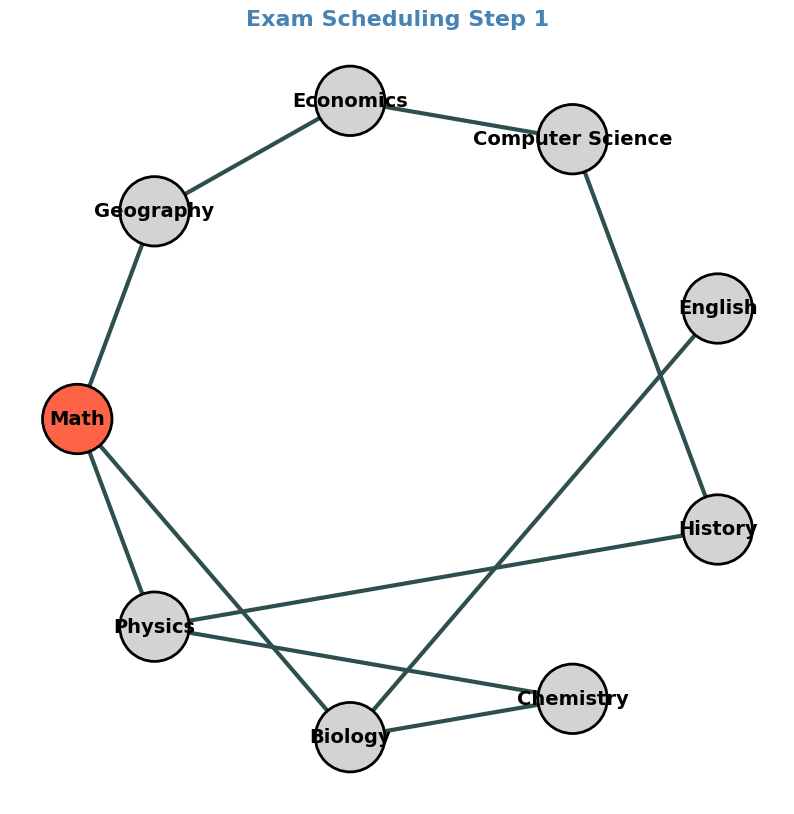

Step 2: Exam Physics scheduled in Slot 2


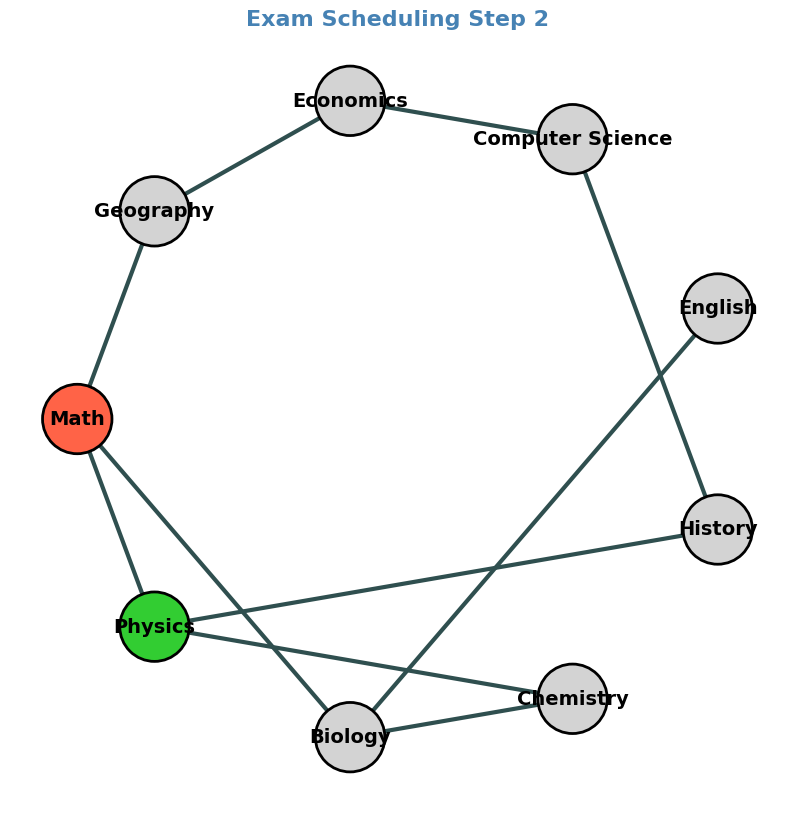

Step 3: Exam Biology scheduled in Slot 2


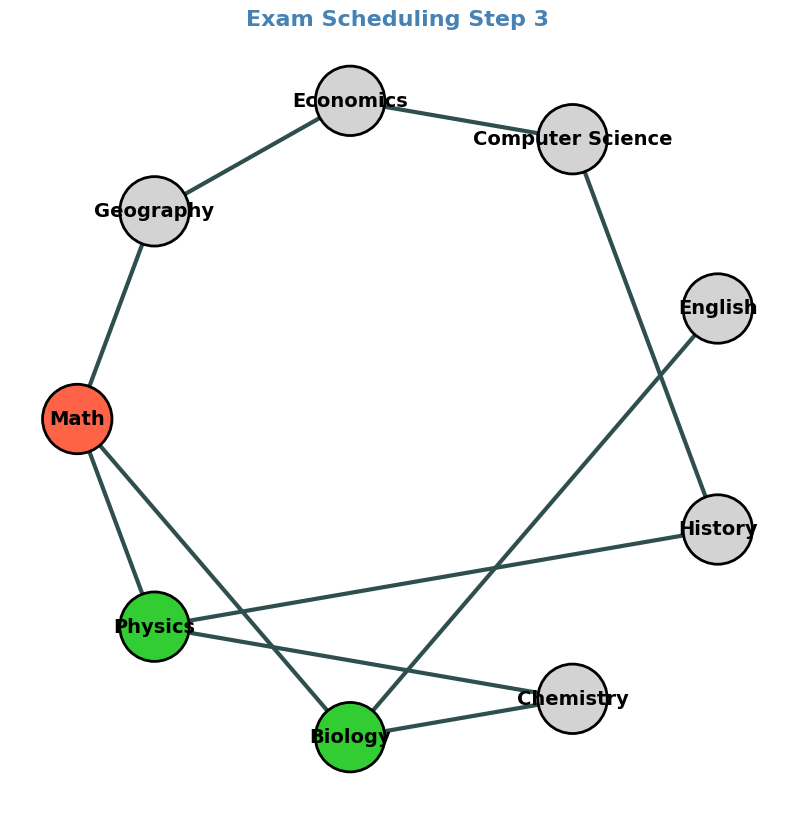

Step 4: Exam Chemistry scheduled in Slot 1


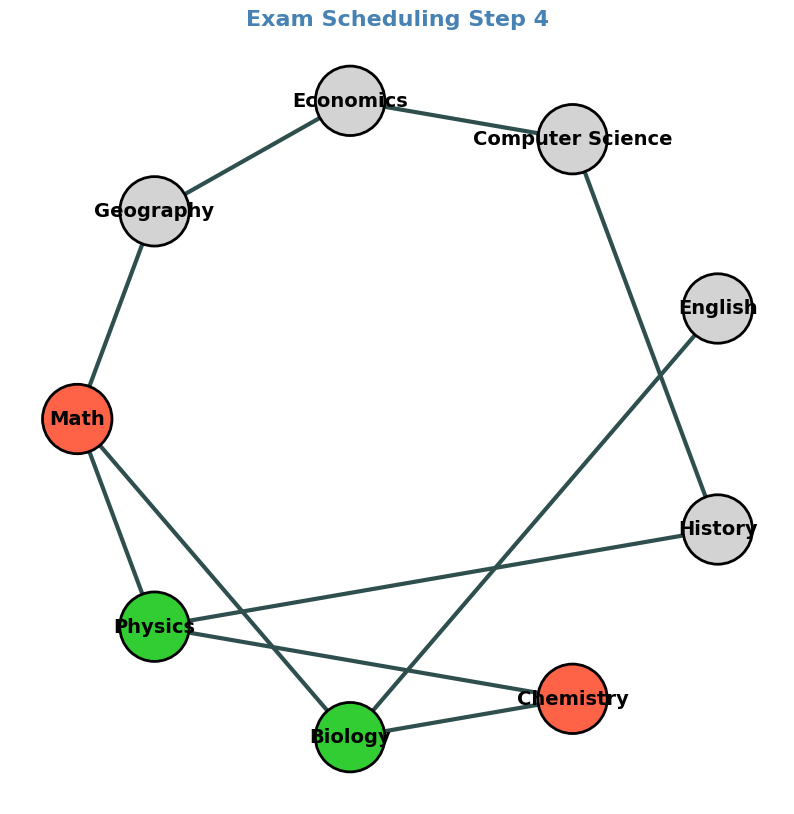

Step 5: Exam History scheduled in Slot 1


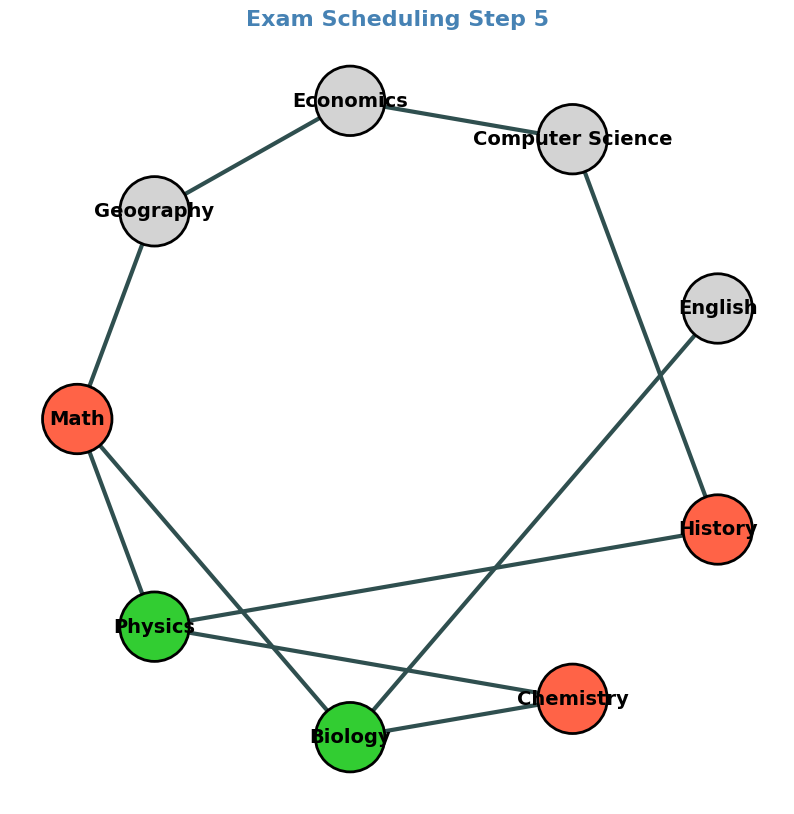

Step 6: Exam English scheduled in Slot 1


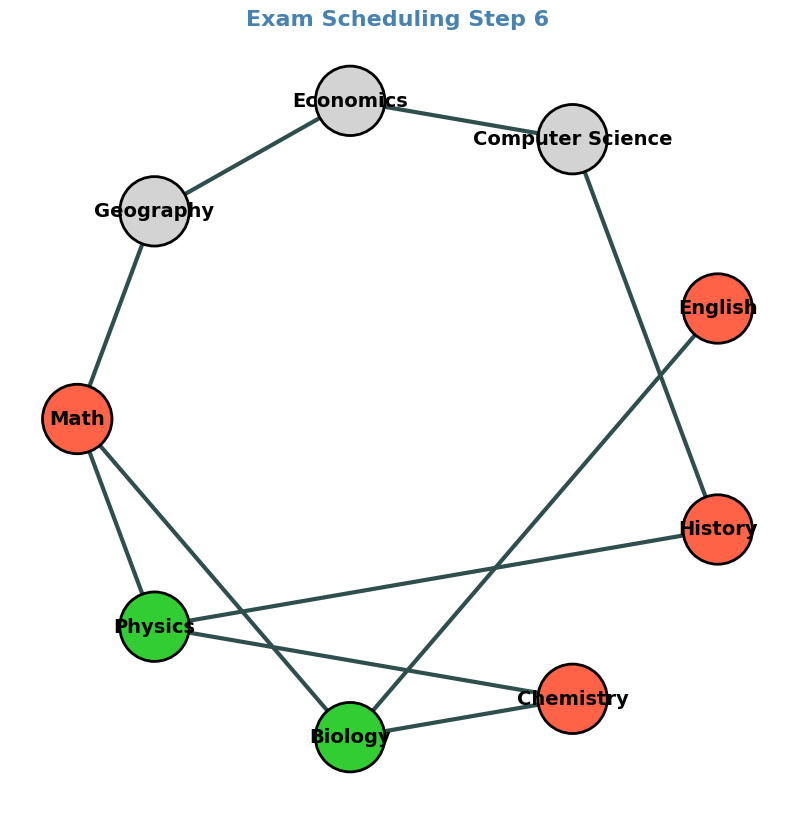

Step 7: Exam Computer Science scheduled in Slot 2


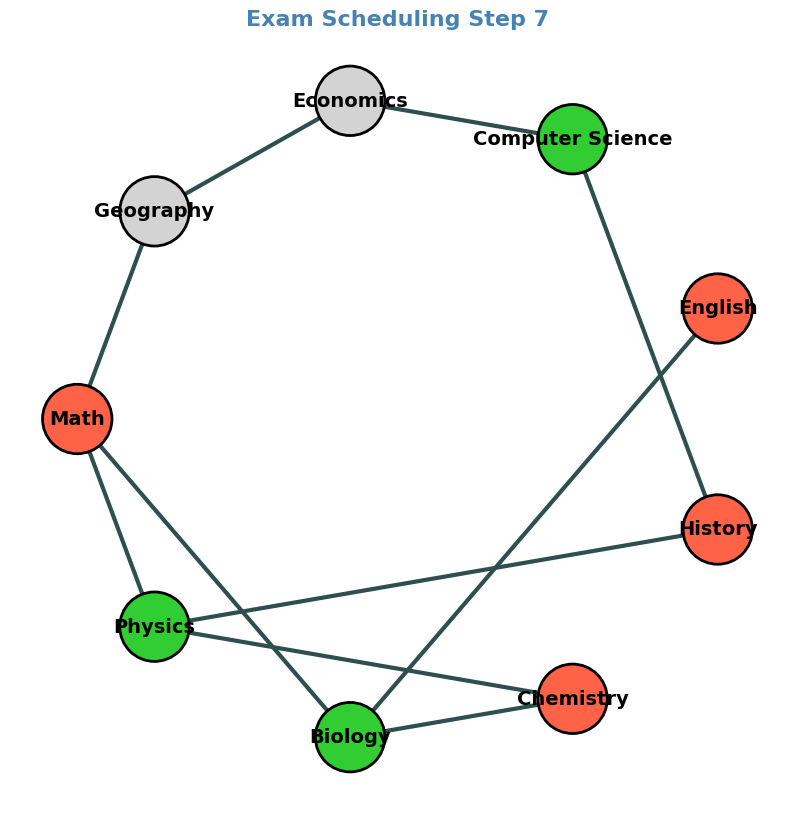

Step 8: Exam Economics scheduled in Slot 1


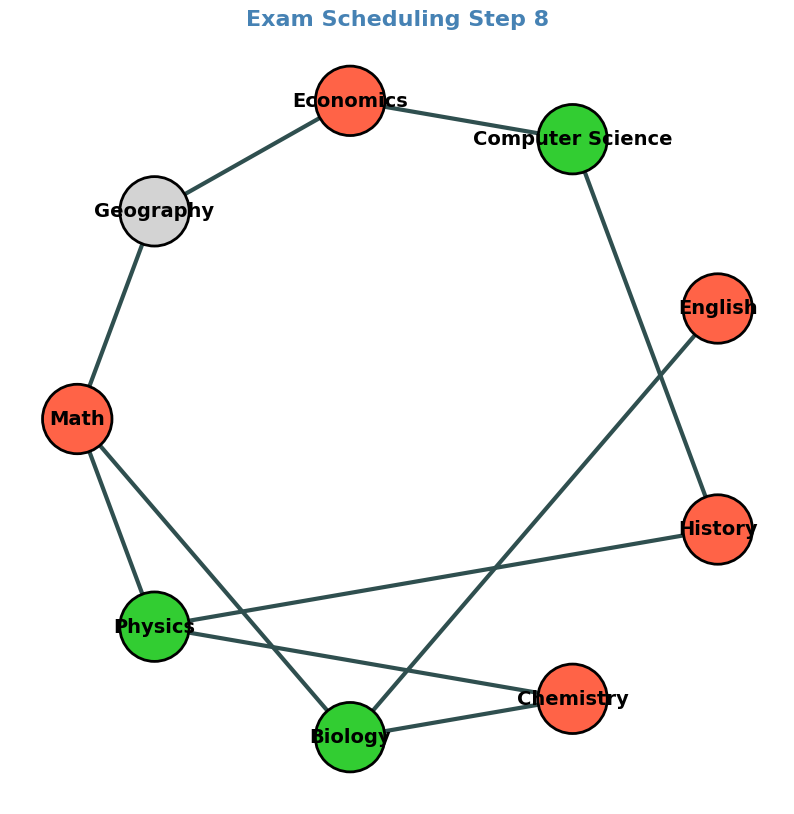

Step 9: Exam Geography scheduled in Slot 2


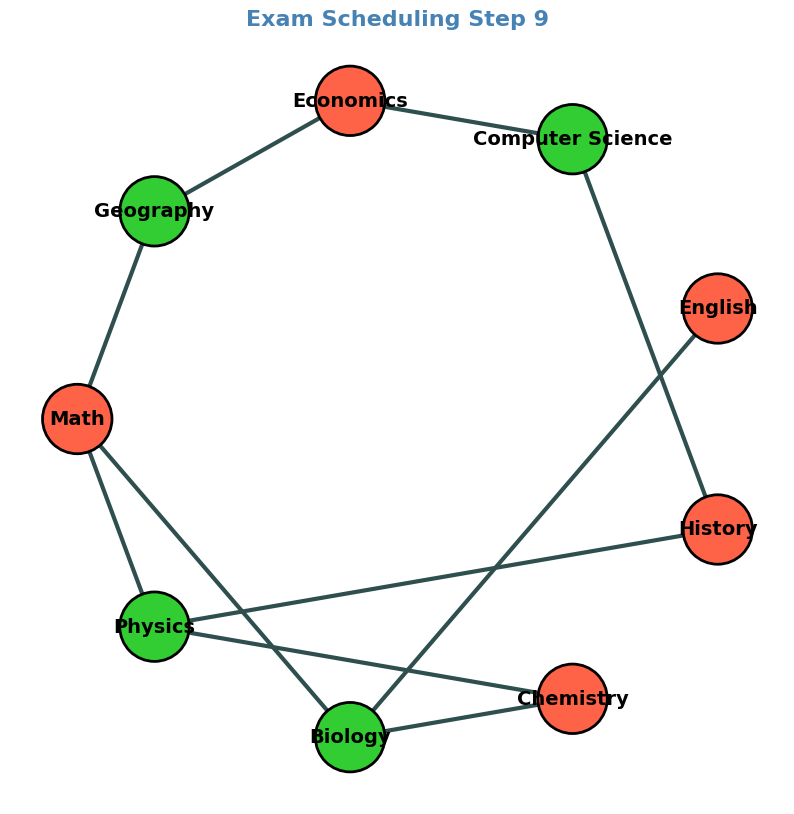

Final Exam Schedule: {'Math': 'Slot 1', 'Physics': 'Slot 2', 'Biology': 'Slot 2', 'Chemistry': 'Slot 1', 'History': 'Slot 1', 'English': 'Slot 1', 'Computer Science': 'Slot 2', 'Economics': 'Slot 1', 'Geography': 'Slot 2'}


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Define the graph where each node is an exam and edges represent student conflicts
G = nx.Graph()

# List of exams
exams = ["Math", "Physics", "Chemistry", "Biology", "History", "English", "Computer Science", "Economics", "Geography"]

# List of conflicts: These pairs of exams share students and cannot be scheduled at the same time
conflicts = [("Math", "Physics"), ("Math", "Biology"), ("Physics", "Chemistry"), ("Physics", "History"),
             ("Chemistry", "Biology"), ("Biology", "English"), ("History", "Computer Science"),
             ("Computer Science", "Economics"), ("Economics", "Geography"), ("Geography", "Math")]

# Add edges representing conflicts between exams
G.add_edges_from(conflicts)

# Step 2: Define the available time slots (similar to colors in the original graph coloring problem)
time_slots = ['Slot 1', 'Slot 2', 'Slot 3']

# Step 3: Function to visualize the exam scheduling step by step
def visualize_schedule(assignment, step):
    plt.figure(figsize=(10, 10))  # Larger figure size for better clarity

    # Use shell_layout for a circular style graph
    pos = nx.shell_layout(G)

    # Default color for unscheduled exams is light grey
    node_colors = ['#D3D3D3'] * len(G.nodes)
    # Assign colors (time slots) to the nodes based on the current assignment
    for node, color in assignment.items():
        if color == 'Slot 1':
            node_colors[list(G.nodes).index(node)] = '#FF6347'  # Tomato Red for Slot 1
        elif color == 'Slot 2':
            node_colors[list(G.nodes).index(node)] = '#32CD32'  # Lime Green for Slot 2
        elif color == 'Slot 3':
            node_colors[list(G.nodes).index(node)] = '#1E90FF'  # Dodger Blue for Slot 3

    # Set the edge colors and thickness
    edge_colors = ['#2F4F4F'] * len(G.edges)  # Dark Slate Gray for edges
    edge_widths = 3  # Thicker edges for emphasis

    # Draw nodes
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_widths)

    # Draw nodes with current time slots
    nx.draw_networkx_nodes(G, pos, node_size=2500, node_color=node_colors,
                           edgecolors='black', linewidths=2)

    # Draw node labels (exam names)
    nx.draw_networkx_labels(G, pos, font_size=14, font_color='black', font_family='sans-serif', font_weight='bold')

    plt.title(f"Exam Scheduling Step {step}", fontsize=16, fontweight='bold', color='#4682B4')  # Steel Blue title
    plt.axis('off')  # Turn off the axes for cleaner visuals
    plt.show()

# Step 4: Function to check if a time slot assignment is valid
def is_valid_slot(exam, slot, assignment):
    # Check all neighboring exams to ensure no conflict (no neighbor has the same time slot)
    for neighbor in G.neighbors(exam):
        if neighbor in assignment and assignment[neighbor] == slot:
            return False  # Conflict found
    return True  # No conflict

# Step 5: Function to assign time slots to exams with conflict checking (sequential assignment)
def schedule_exams():
    assignment = {}  # Dictionary to store exam-time slot assignment
    exam_list = list(G.nodes)  # Get the list of exams (nodes)

    # Step through each exam and assign time slots while checking for conflicts
    for i, exam in enumerate(exam_list):
        found_slot = False  # Track if a valid time slot was found
        for slot in time_slots:
            if is_valid_slot(exam, slot, assignment):
                assignment[exam] = slot  # Assign the time slot
                print(f"=======================================")
                print(f"Step {i+1}: Exam {exam} scheduled in {slot}")
                print(f"=======================================")
                visualize_schedule(assignment, i+1)  # Visualize the schedule at each step
                found_slot = True
                break  # Move to the next exam once a valid slot is found

        if not found_slot:
            print(f"Error: Unable to assign a valid time slot to exam {exam} with available time slots.")
            return None  # Fail if we can't schedule an exam

    return assignment

# Step 6: Schedule the exams and display the process step by step
final_schedule = schedule_exams()

# Print the final assignment
if final_schedule:
    print("Final Exam Schedule:", final_schedule)
else:
    print("Scheduling failed due to insufficient time slots or conflicts.")


Ok, so actually whats going on in this code is that we are scheduling exams for students, we made a conflict with some other exams so that they cannot be scheduled at that same time (connected by edges). More basically we have assigned a ttime slot to each of them. the function is not valid will check whether a particular exam can be scheduled in a given time slot without conflict. The visualize schedule function shows how the exams are being scheduled step by step.